In [6]:
import numpy as np                  
import pandas as pd      
import json
import platypus as plat        
from matplotlib import pyplot as plt
import pygmo as pg

In [103]:
CONDORCET_CON_UNCAP = pd.json_normalize(json.load(open("condorcet-conscious-uncap.json"))["data"])
CA_CON_UNCAP = pd.json_normalize(json.load(open("combined-approval-conscious-uncap copy.json"))["data"])
RANGE_CON_UNCAP = pd.json_normalize(json.load(open("range-conscious-uncap.json"))["data"])
BORDA_CON_UNCAP = pd.json_normalize(json.load(open("borda-conscious-uncap.json"))["data"])

In [104]:
def percentage_change(data):
    per_change = []
    for i in range(1, len(data)):
        per_change.append( ((data[i] - data[i-1]) / data[i-1]) * 100)
    return per_change

In [105]:
def gen_time(df):
    gen_avg_time = []
    gen_time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
    for gen in gen_time_df:
        gen_times = []
        for time in gen_time_df[gen].tolist():
            gen_times.append(time)
        gen_avg_time.append(float(np.mean(gen_times)))

    running_sum = [gen_avg_time[0]]
    for i in range(1,6):
        running_sum.append(gen_avg_time[i-1] + gen_avg_time[i]) 
    return gen_avg_time, running_sum

In [106]:
def avg_gen_spar(df):
    gen_avg = []
    gen_spar_df = df.filter(["gen0-sparsity", "gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    for gen in gen_spar_df:
        gen_avg.append(float(np.mean(gen_spar_df[gen])))
    return gen_avg

In [107]:
# front must represented a a 2d matrix
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        print("no good ref point for: ")
        h = 0
        print(front)
    return h

def avg_gen_hv(df):
    gen_avg = []
    gen_front_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    for gen in gen_front_df:
        gen_hv = []
        for front in gen_front_df[gen].tolist():
            try: 
                gen_hv.append(front_hv(front))
            except TypeError:
                x = 1
                #skip
        gen_avg.append(float(np.mean(gen_hv)))
    return gen_avg

In [108]:
uncap_con_borda_spar = avg_gen_spar(BORDA_CON_UNCAP)
uncap_con_range_spar = avg_gen_spar(RANGE_CON_UNCAP)
uncap_con_ca_spar = avg_gen_spar(CA_CON_UNCAP)
uncap_con_condorcet_spar = avg_gen_spar(CONDORCET_CON_UNCAP)

uncap_con_borda_spar_diff = percentage_change(uncap_con_borda_spar)
uncap_con_range_spar_diff = percentage_change(uncap_con_range_spar)
uncap_con_ca_spar_diff = percentage_change(uncap_con_ca_spar)
uncap_con_condorcet_spar_diff = percentage_change(uncap_con_condorcet_spar)

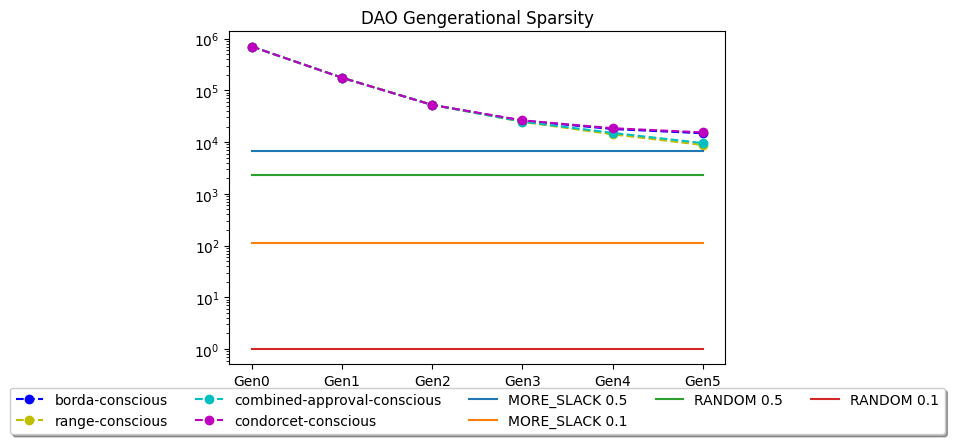

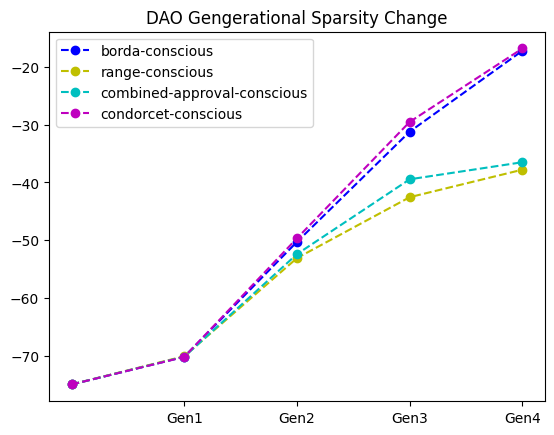

In [109]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_ca_spar
ax.plot(y, '--co', label='combined-approval-conscious')

y = uncap_con_condorcet_spar
ax.plot(y, '--mo', label='condorcet-conscious')


y = [6712.830881019108] * 6
ax.plot(y, label='MORE_SLACK 0.5')

y = [112.78247231847135] * 6
ax.plot(y, label='MORE_SLACK 0.1')


y = [2332.961751464968] * 6
ax.plot(y, label='RANDOM 0.5')

y = [01.00408346496816] * 6
ax.plot(y, label='RANDOM 0.1')

plt.title("DAO Gengerational Sparsity")
plt.yscale("log")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


plt.show()


fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar_diff
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_range_spar_diff
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_ca_spar_diff
ax.plot(y, '--co', label='combined-approval-conscious')

y = uncap_con_condorcet_spar_diff
ax.plot(y, '--mo', label='condorcet-conscious')

plt.title("DAO Generational Sparsity Change")
plt.legend()
plt.show()

In [110]:
uncap_con_borda_hv = avg_gen_hv(BORDA_CON_UNCAP)
uncap_con_range_hv = avg_gen_hv(RANGE_CON_UNCAP)
uncap_con_ca_hv = avg_gen_hv(CA_CON_UNCAP)
uncap_con_condorcet_hv = avg_gen_hv(CONDORCET_CON_UNCAP)

uncap_con_borda_hv_diff = percentage_change(uncap_con_borda_hv)
uncap_con_range_hv_diff = percentage_change(uncap_con_range_hv)
uncap_con_ca_hv_diff = percentage_change(uncap_con_ca_hv)
uncap_con_condorcet_hv_diff = percentage_change(uncap_con_condorcet_hv)

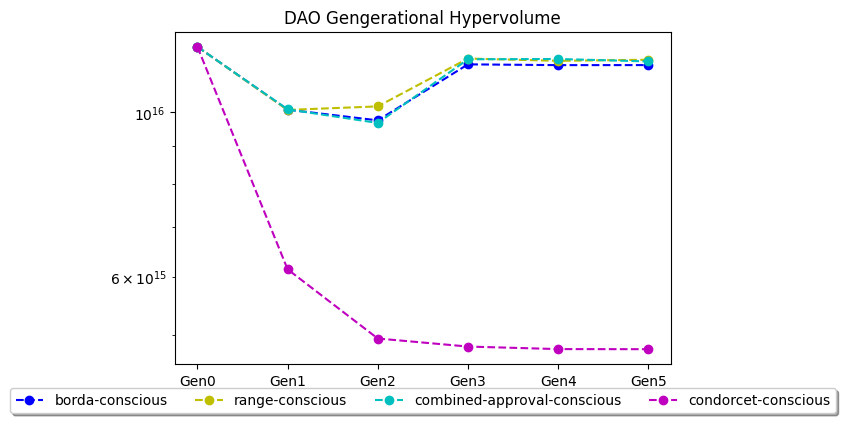

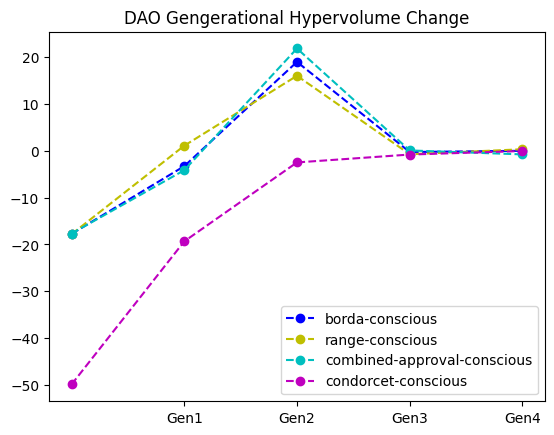

In [111]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_hv
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_range_hv
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_ca_hv
ax.plot(y, '--co', label='combined-approval-conscious')

y = uncap_con_condorcet_hv
ax.plot(y, '--mo', label='condorcet-conscious')


plt.title("DAO Gengerational Hypervolume")
plt.yscale("log")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


plt.show()


fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_hv_diff
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_range_hv_diff
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_ca_hv_diff
ax.plot(y, '--co', label='combined-approval-conscious')

y = uncap_con_condorcet_hv_diff
ax.plot(y, '--mo', label='condorcet-conscious')

plt.title("DAO Gengerational Hypervolume Change")
plt.legend()
plt.show()


In [112]:
uncap_com_borda_t, uncap_con_borda_rst = gen_time(BORDA_CON_UNCAP)
uncap_con_range_t, uncap_con_range_rst = gen_time(RANGE_CON_UNCAP)
uncap_con_ca_t, uncap_con_ca_rst = gen_time(CA_CON_UNCAP)
uncap_con_condorcet_t, uncap_con_condorcet_rst = gen_time(CONDORCET_CON_UNCAP)

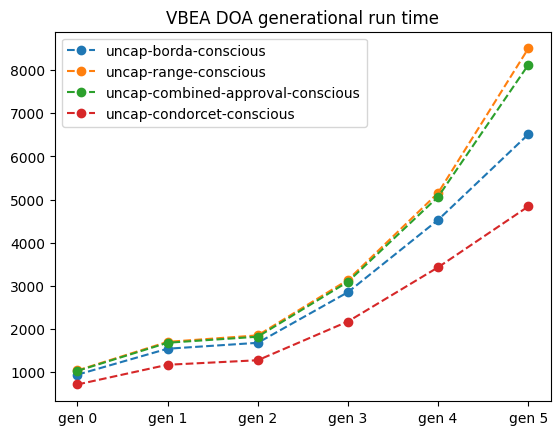

In [113]:
fig, ax = plt.subplots()

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)

plt.plot(x, uncap_con_borda_rst, '--o', label = "uncap-borda-conscious")

plt.plot(x, uncap_con_range_rst, '--o', label = "uncap-range-conscious")

plt.plot(x, uncap_con_ca_rst, '--o', label = "uncap-combined-approval-conscious")

plt.plot(x, uncap_con_condorcet_rst, '--o', label = "uncap-condorcet-conscious")

plt.legend()
plt.title("VBEA DOA Average Generational Run Time")
plt.show()

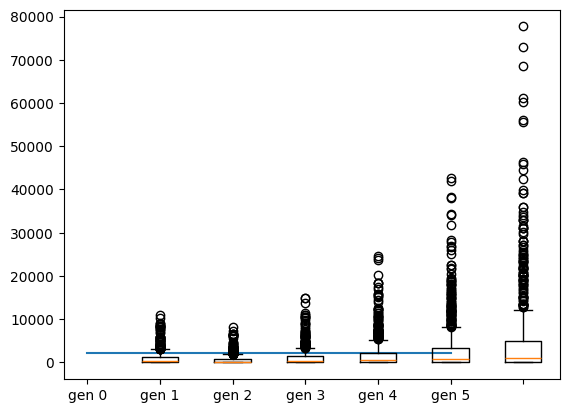

In [123]:
gen_avg, gen_avg_running = gen_time(CONDORCET_CON_UNCAP)

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)
plt.plot([2242.856050955414] * 6)

runtimes = [CA_CON_UNCAP["gen0-time"].tolist(), 
            CA_CON_UNCAP["gen1-time"].tolist(), 
            CA_CON_UNCAP["gen2-time"].tolist(),
            CA_CON_UNCAP["gen3-time"].tolist(),
            CA_CON_UNCAP["gen4-time"].tolist(),
            CA_CON_UNCAP["gen5-time"].tolist()]
plt.boxplot(runtimes, tick_labels=xticks)
ax.set_ylim(ymin=0)
plt.show()

In [114]:
def failure_rate(df):
    n = 156 * 5
    gen_runtimes = [df["gen0-time"].tolist(), 
            df["gen1-time"].tolist(), 
            df["gen2-time"].tolist(),
            df["gen3-time"].tolist(),
            df["gen4-time"].tolist(),
            df["gen5-time"].tolist()]
    error_rate = []
    for gen_time in gen_runtimes:
        count = 0;
        for time in gen_time:
            if(time == -1):
                count+= 1
        error_rate.append((count / n))

    return error_rate